<a href="https://colab.research.google.com/github/A-Wadhwani/ME498-Project/blob/main/01_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Open drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import tensorflow as tf
import pandas as pd
import random
from datetime import datetime
from sklearn.metrics import r2_score
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.4.1


In [ ]:
power_df = pd.read_csv("drive/My Drive/ASHRAE_DATA/train.csv")
weather_df = pd.read_csv("drive/My Drive/ASHRAE_DATA/weather_train.csv")
meta_df = pd.read_csv("drive/My Drive/ASHRAE_DATA/building_metadata.csv")

In [ ]:
power_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
weather_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
# Selecting one place
sel_df = meta_df[meta_df["building_id"] == 1]
print(sel_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1 non-null      int64  
 1   building_id  1 non-null      int64  
 2   primary_use  1 non-null      object 
 3   square_feet  1 non-null      int64  
 4   year_built   1 non-null      float64
 5   floor_count  0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes
None


In [ ]:
# Combine building metadata and weather information based on matching site_id's
join_df = weather_df.merge(meta_df, left_on=('site_id'), right_on=('site_id'), how = 'inner', suffixes=('_left','_right'))
join_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN
1,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN
2,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN
3,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN
4,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN


In [ ]:
print(weather_df.info())
print(sel_df.info())
print()
print(join_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1 non-null      int64  
 1   building_id  1 non-null      int64  
 2   

In [ ]:
# Now Joining the Weather/Building Metadata with Building Consumption data, on building_id data
join1_df = join_df.merge(power_df, left_on=('building_id', 'timestamp'), right_on=('building_id', 'timestamp'), how = 'inner', suffixes=('_left','_right'))
join1_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN,0,0.0
1,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN,0,0.0
2,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN,0,0.0
3,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN,0,0.0
4,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN,0,0.0


In [ ]:
print(join1_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site_id             int64  
 1   timestamp           object 
 2   air_temperature     float64
 3   cloud_coverage      float64
 4   dew_temperature     float64
 5   precip_depth_1_hr   float64
 6   sea_level_pressure  float64
 7   wind_direction      float64
 8   wind_speed          float64
 9   building_id         int64  
 10  primary_use         object 
 11  square_feet         int64  
 12  year_built          float64
 13  floor_count         float64
 14  meter               int64  
 15  meter_reading       float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.5+ GB
None


In [ ]:
join1_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,square_feet,year_built,floor_count,meter,meter_reading
count,2.012560e+07,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07,2.012560e+07,2.012560e+07,8.012299e+06,3.495553e+06,2.012560e+07,2.012560e+07
mean,7.967773e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00,7.972116e+02,1.077848e+05,1.968346e+03,4.175366e+00,6.617305e-01,2.124813e+03
std,5.092223e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00,4.263729e+02,1.171616e+05,3.020659e+01,3.992855e+00,9.310748e-01,1.535796e+05
min,0.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00,3.910000e+02,3.252700e+04,1.951000e+03,1.000000e+00,0.000000e+00,1.830000e+01
50%,9.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00,8.940000e+02,7.270900e+04,1.970000e+03,3.000000e+00,0.000000e+00,7.875000e+01
75%,1.300000e+01,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00,1.176000e+03,1.391130e+05,1.993000e+03,6.000000e+00,1.000000e+00,2.678430e+02
max,1.500000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,1.448000e+03,8.750000e+05,2.017000e+03,2.600000e+01,3.000000e+00,2.190470e+07


In [ ]:
join1_df = join1_df[join1_df['meter'] == 0]
print(join1_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017408 entries, 0 to 20125604
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site_id             int64  
 1   timestamp           object 
 2   air_temperature     float64
 3   cloud_coverage      float64
 4   dew_temperature     float64
 5   precip_depth_1_hr   float64
 6   sea_level_pressure  float64
 7   wind_direction      float64
 8   wind_speed          float64
 9   building_id         int64  
 10  primary_use         object 
 11  square_feet         int64  
 12  year_built          float64
 13  floor_count         float64
 14  meter               int64  
 15  meter_reading       float64
dtypes: float64(10), int64(4), object(2)
memory usage: 1.5+ GB
None


In [ ]:
srs = {"Education" : 0}       # Stratified Sample: Taking a roughly equal amount of buildings with different primary uses
sel2_df = pd.DataFrame(join1_df.head())
for i in range(0, 1400):
  use = join1_df[join1_df['building_id'] == i]
  if not use.empty:
    use = use['primary_use'].iloc[0]
    if srs.get(use, 0) < 15:
        sel2_df = sel2_df.append(join1_df[join1_df['building_id'] == i])
        srs[use] = srs.get(use, 0) + 1


In [ ]:
# View list of occurences of each primary use

sorted_srs = {k: v for k, v in sorted(srs.items(), key=lambda item: item[1])}

pd.DataFrame(sorted_srs.items(), columns=["Primary Use", "Occurrences"])

,Primary Use,Occurrences
0,Religious worship,3
1,Utility,3
2,Food sales and service,5
3,Technology/science,6
4,Manufacturing/industrial,9
5,Services,9
6,Retail,11
7,Warehouse/storage,12
8,Education,15
9,Lodging/residential,15


In [ ]:
sel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528459 entries, 0 to 20125450
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   site_id             1528459 non-null  int64  
 1   timestamp           1528459 non-null  object 
 2   air_temperature     1528050 non-null  float64
 3   cloud_coverage      892199 non-null   float64
 4   dew_temperature     1527968 non-null  float64
 5   precip_depth_1_hr   1389866 non-null  float64
 6   sea_level_pressure  1466652 non-null  float64
 7   wind_direction      1469643 non-null  float64
 8   wind_speed          1527470 non-null  float64
 9   building_id         1528459 non-null  int64  
 10  primary_use         1528459 non-null  object 
 11  square_feet         1528459 non-null  int64  
 12  year_built          971809 non-null   float64
 13  floor_count         193632 non-null   float64
 14  meter               1528459 non-null  int64  
 15  meter_reading 

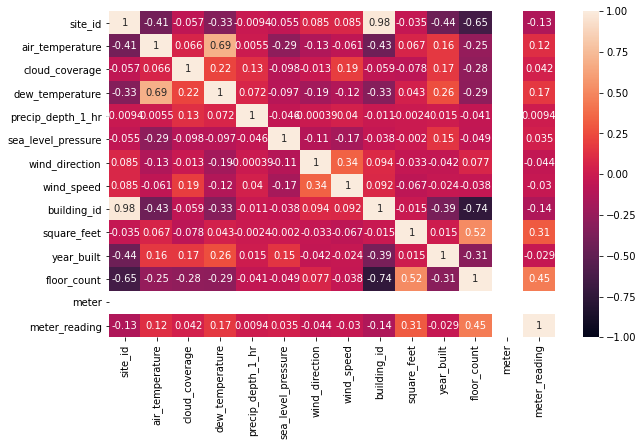

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sel2_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
sel2_df.to_csv("drive/My Drive/ASHRAE_DATA/cleaned_data.csv")